In [ ]:
!pip install mplcyberpunk
!pip install python-bcb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.27.1, but you have requests 2.31.0 which is incompatible.


In [ ]:
import mplcyberpunk
import seaborn as sns
import pandas as pd
from bcb import sgs
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from datetime import datetime
from datetime import timedelta

plt.style.use("cyberpunk")

In [ ]:
import numpy as np
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

<ipython-input-3-533cb06baa56>:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
produto_ninformado = pd.read_csv('/content/drive/MyDrive/Dados/Produto/produto_ninformado.csv', sep=';')
produto_ninformado['Data'] = pd.to_datetime(produto_ninformado['Data'], format='%d/%m/%Y')

In [ ]:
produto_ninformado['ValorBase'] = produto_ninformado['ValorBase'].str.replace(',', '.').astype(float)

In [ ]:
plt.plot(produto_consignado.ValorBase)

# PREVISÕES COM ARIMA PRODUTO NÃO INFORMADO

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(produto_ninformado['ValorBase'], order=(1, 1, 0))
arima_fit = arima.fit()

In [ ]:
# Calcular o quadrado dos resíduos médios
mse = (arima_fit.resid).mean()
print(mse)

1846.9877101927996


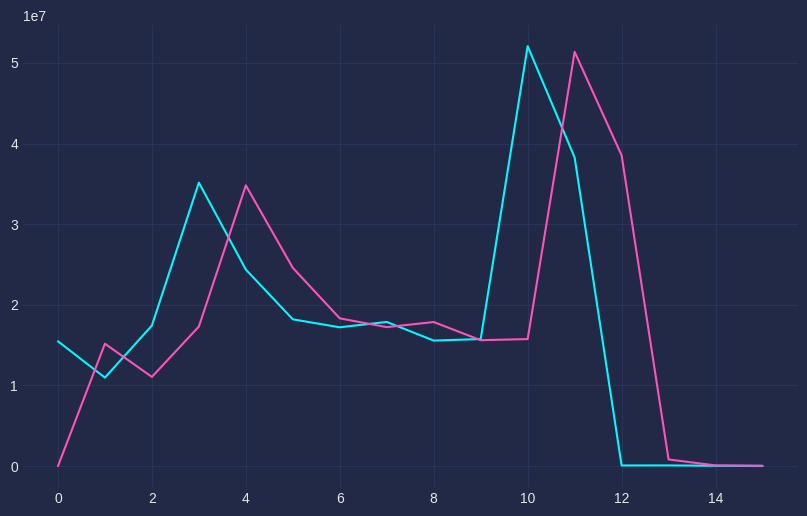

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(produto_ninformado.ValorBase)
plt.plot(arima_fit.predict(typ='levels'))

In [ ]:
produto_ninformado.tail(6).round()

,Data,ValorBase
10,2021-11-01,52082630.0
11,2021-12-01,38275719.0
12,2022-01-01,83646.0
13,2022-02-01,89966.0
14,2022-03-01,45724.0
15,2022-04-01,28660.0


In [ ]:
# RESULTADO ARIMA PARA OS PROXIMOS 6 MESES
previsão = (arima_fit.forecast(steps=6).round())
arima_fit.forecast(steps=6).round()

16    28993.0
17    28986.0
18    28986.0
19    28986.0
20    28986.0
21    28986.0
Name: predicted_mean, dtype: float64

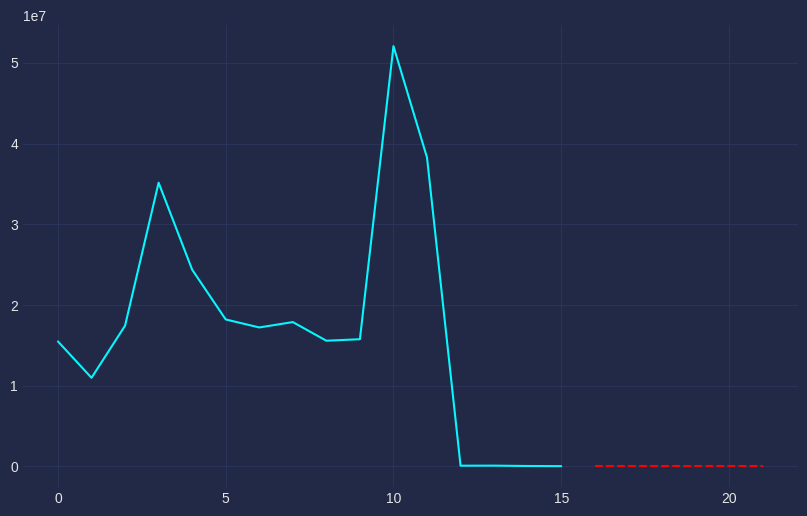

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(produto_ninformado.ValorBase)
plt.plot(previsão, color='red', linestyle='--', label='Previsão')